<h1 style="color:#2192f1" align="center"> LOGISTIC REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LogisticRegression.src.classification import gradient_descent_ascent, metrics, log_likelihood, negative_log_likelihood
from LogisticRegression.src.visualization import confusion_matrix

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [6]:
df = pd.read_csv("data/raisin_binary_classification/Raisin_Dataset.csv")

In [7]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [8]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


<h2 align="center" style="color:#f0e912">DATA PREPROCESSING</h2>


In [9]:
for c in df.select_dtypes(exclude=['object']):
    max = df[c].max()
    min = df[c].min()
    df[c] = df[c].apply(lambda x: (x - min) / (max - min))

In [10]:
for index, value in enumerate(df['Class'].unique()):
    df.loc[df['Class'] == value, ["Class"]] = index

In [11]:
df_train = df.sample(random_state=1, frac=0.8)
df_test = df.drop(df_train.index)

<h3 align="center" style="color:#5F75BF">CLASS BALANCE CHECK</h3>


In [44]:
df_train["Class"].value_counts()

Class
0    369
1    351
Name: count, dtype: int64

<h3 align="center" style="color:#5F75BF">ADD INTERCEPT TERM</h3>


In [13]:
# Transform features and target into numpy
X = df_train.drop("Class", axis=1)
y = df_train["Class"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X_intercept = np.concatenate((i_term, X), axis=1)

In [14]:
# Transform features and target into numpy
X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"].values.reshape(-1, 1)
# Intercept feature
i_term_test = np.ones((len(X_test), 1))
# Add intercept feature in other features
X_test_intercept = np.concatenate((i_term_test, X_test), axis=1)

<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [38]:
theta, final_loss, weights_history, loss_history, metrics = gradient_descent_ascent(X_intercept, y, type="SGD", alpha=1 , loss_function=negative_log_likelihood)

In [39]:
loss_history

array([499.06597   , 570.1261774 , 645.39036642, 732.23968937,
       812.86468379, 867.39864688, 500.47058422, 592.98619458,
       469.25528643, 509.46897114, 499.49739948, 602.88505924,
       717.37408404, 453.60642782, 512.44750394, 600.94488072,
       647.33197902, 745.82275476, 796.70522207, 462.93387383,
       581.56133272, 430.32826543, 479.23012465, 418.73543884,
       447.96992574, 509.41121177, 417.87371336, 507.76566689,
       615.55665842, 689.38890533, 743.12447703, 396.96210474,
       439.32821358, 492.50822893, 615.69582812, 381.44840094,
       444.45087648, 374.94119055, 434.96209152, 563.97508652,
       397.84449071, 473.36864049, 363.54324227, 396.31794194,
       393.49894668, 439.46927213, 492.92716735, 358.38871278,
       468.3382762 , 478.87060409, 566.17988   , 574.68569926,
       356.10207971, 398.42200469, 361.49895978, 421.07651475,
       355.60265547, 384.16608897, 364.24522658, 347.42822521,
       389.07244216, 479.91269085, 506.97759725, 353.18

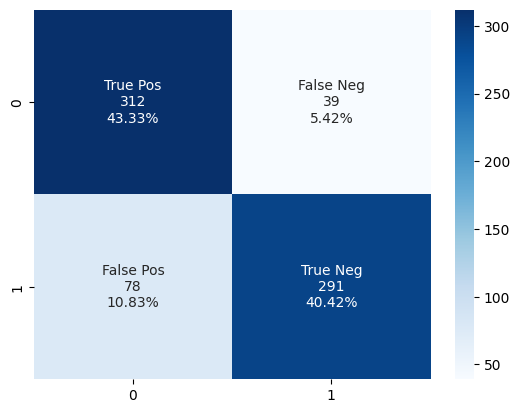

In [41]:
confusion_matrix(X_intercept,y, theta)

<h2 align="center" style="color:#f0e912">TESTING</h2>


In [40]:
metrics(X_test_intercept, y_test, theta)

{'accuracy': np.float64(0.85),
 'precision': np.float64(0.8461538461538461),
 'recall': np.float64(0.8888888888888888),
 'f1_score': np.float64(0.8669950738916256)}

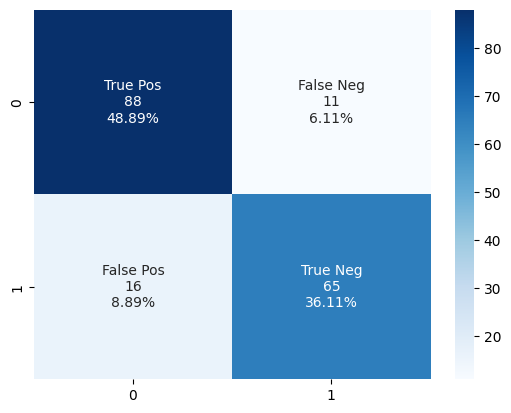

In [42]:
confusion_matrix(X_test_intercept,y_test, theta)